# Ngày 1: Linear Regression

## Lời mở đầu

Trong ngày đầu tiên chúng ta sẽ tiếp cận 1 bài toán căn bản (nhập môn) của Machine Learning. Đây là 1 bài toán trong lớp bài toán Supervised Learning (Học giám sát) bằng cách áp dụng 1 hàm tuyến tính cố gắng căn chỉnh sao cho nó ít sai khác với dữ liệu. Bạn sẽ dễ dàng làm quen khi bạn đã học qua xác suất thống kê :3!

## Phần 1: Giới thiệu

### Vấn đề

Giả sử rằng ta đã thống kê được 1000 căn nhà đăng được trong một thành phố giả tưởng PolyCity, trong dữ liệu thống kê ta thống kê về diện tích căn nhà và giá bán của căn nhà đó? Một câu hỏi đặt ra với chúng ta là liệu rằng với bộ dữ liệu trên, ta có tìm được mối quan hệ giữa giá nhà và diện tích căn nhà không? Khi ta tìm được mối quan hệ ấy ta có thể dự đoán với dữ liệu nào đó (có thể trong bộ dữ liệu ta thu thập, hay chưa từng thống kê) về diện tích căn nhà, ta có thể sấp sĩ được giá nhà không?

Khi ta thử plot chúng lên đồ thị hoặc dựa trên kinh nghiệm suy đoán rằng mối quan hệ tuyến tính, tức là giá nhà tăng khi diện tích căn nhà tăng. Chúng được sấp sĩ bởi hàm.

$$\hat{y}(x) = w * x + b$$

Trong đó:
- $\hat{y}$ là số tiền dự đoán. (Đọc là y hat).
- $w$ là hằng số của hàm.
- $b$ là giá trị hằng số không phụ thuộc dữ liệu. (bias)

Vì giá căn nhà là hàm $\hat{y}$ có dạng tuyến tính nên nó được gọi là linear. Bài toán mà chúng ta đang làm thuộc loại regression (Nên chúng ta mới gọi nó là linear regression). Mục đích của bài toán này là tìm ra các hằng số ${w,b}$ của hàm $\hat{y}$ sao cho nó tối ưu nhất.

> Chú ý 1: $y$ là giá trị thực sự outcome (giá trị mà ta đi khảo sát thống kê), $\hat{y}$ là giá trị mà mô hình dự đoán. Đây là 2 giá trị về mặt ý nghĩa chúng khác nhau, nhưng chúng có một mối quan hệ nào đó với nhau khiến ta có thể tối ưu được hàm dự đoán và có thể sử dụng giá trị $\hat{y}$ như một giá trị sấp sĩ của giá trị thực sự chính xác.

> Chú ý 2: Linear Regression hiểu đơn giản là nó thẳng, phẳng. Với không gian 2 chiều, hàm số tuyến tính là 1 đường thẳng. Không gian 3 chiều nó sẽ là 1 mặt phẳng. Còn nhiều hơn không gian 3 chiều nó sẽ gọi là mặt siêu phẳng (hyperplane). Các hàm tuyến tính là hàm số đơn giản nhất vì nó dễ hình dung và tính toán.

## Phần 2: Phân tích toán học

### Mở rộng

Thực sự ngoài thực tế ta không thể chỉ khẳng định giá nhà thông qua mỗi yếu tố về diện tích mà còn các yếu tố khác như là khoảng cách đến trung tâm thành phố, bao nhiêu phòng ngủ, bao nhiêu tầng, ... 

Bởi thế ta không ta không thể dùng mỗi 1 biến x để biểu diễn được mà lần này ta cần mở rộng x ra thành 1 vector chứa các yếu tố của căn nhà (như $x_1$ là thông tin diện tích căn nhà, $x_2$ là số phòng ngủ, $x_3$ là số lầu, $x_4$ là khoảng cách tới trung tâm thành phố,...)

Quy ước:
- $n$ là số điểm dữ liệu (số căn nhà ta dùng để thống kê cho mô hình trong bài toán này).
- $m$ là số thuộc tính (yếu tố).

Nên phương trình có dạng:
$$\hat{y}(\vec{x}) = \sum_{i = 1}^{m}(w_i * x_i) + bias = \vec{w_i} \cdot \vec{x_i} + bias$$

### Hàm sai số dự đoán

Gọi $e_i$ là giá trị sai khác của giá trị được thực sự thống kê $y$ và giá trị của mô hình dự đoán $\hat{y}_i$, vì vậy $e_i$ phải thể là một hàm gì đó thể hiện được sự khác biệt giữa 2 giá trị này nên là $e_i = (\hat{y}_i - y_i)^2$ (mũ 2 vì giá trị $\hat{y}_i - y_i$ có thể tạo ra con số âm, nên bình phương lên khiến cho số đó sẽ là số dương). 

> $y_i$ và $\hat{y}_i$ lần lượt là giá trị thực thống kê của dữ liệu $i$ (ngôi nhà $i$) và giá trị đầu ra tương ứng của mô hình.

Với các giá trị $e_i$ ta cần tìm 1 mô hình làm sao giảm thiểu được tổng các giá trị sai khác $e_i$ càng nhỏ càng tốt. Gọi hàm tổng các giá trị sai khác là: 
$$\mathcal{L} = \frac{1}{2} \sum_{i = 1}^{n} e_i = \frac{1}{2} \sum_{i = 1}^{n}{(y_i - \hat{y}_i)^2} $$

Câu hỏi bạn có thể đặt ra: "Tại sao không dùng giá trị tuyệt đối khi tính $e_i$ mà lấy giá trị bình phương?"
OK mình sẽ thấy bạn sẽ bị rối nhưng để tới phần sau mình sẽ giải thích.
Dữ lại $\frac{1}{2}$ để tiện cho việc tính toán sau này, khi tính đạo hàm hệ sống này sẽ biến mất.

Công việc của ta là phải tìm ra bộ tham số ${\vec{w},bias}$ để giảm chi phí hàm $\mathcal{L}$:
$$\{\vec{w},bias\} = \underset{\vec{w},bias}{\text{argmin}}\mathcal{L} = \underset{\vec{w},bias}{\text{argmin}}\frac{1}{2} \sum_{i = 1}^{n}{(y_i - \hat{y_i})^2} = \underset{\vec{w},bias}{\text{argmin}}\frac{1}{2} \sum_{i = 1}^{n}{(y - (\vec{w_i} \cdot \vec{x_i} + bias))^2}$$

### Thay đổi cách viết

Thay vì ghi $\hat{y} = \vec{w} \cdot \vec{x} + bias$. Ta đổi lại, với $\vec{w} = (w_0,w_1,w_2,...,w_m)$ (với $w_0$ chính là bias) và thêm 1 chiều để số 1 vào $\vec{x}$ ta có $\vec{x} = (1,x_1,x_2,x_3,...,x_m)$, thì viết lại mô hình tuyến tính mới sẽ là:
$$\hat{y} = \vec{w} \cdot \vec{x}$$

Vậy giờ ta thay đổi lại là tìm $\vec{w}$ sao cho $\mathcal{L}$ đạt giá trị bé nhất.
$$\vec{w} = \underset{\vec{w},bias}{\text{argmin}}\frac{1}{2} \sum_{i = 1}^{n}{(y_i - (\vec{w_i} \cdot \vec{x_i})) ^ 2} = \underset{\vec{w},bias}{\text{argmin}}\frac{1}{2} {\|y_i - (\vec{w_i} \cdot \vec{x_i})\|^2}$$

### Giải nghiệm

Ta đã học từ lớp 12 rằng để tìm giá trị cực tiểu, cực đại hay tìm giá trị lớn nhất nhỏ nhất thì ta tìm các vị trí mà hàm số đạt tới "chóp, hoặc tận đáy", mà những nơi như thế thì đạo hàm hàm số bằng 0, vì thế áp dụng vô bài toán này ta tìm đạo hàm hàm sai số dự đoán, rồi giải đạo hàm ấy bằng 0 

$$\frac{\partial \mathcal{L}}{\partial \vec{w}} = \sum_{i = 1}^{n} \vec{x_i}{(y_i - (\vec{w_i} \cdot \vec{x_i})) ^ 2}$$

### Biểu diễn ma trận

Đạo hàm hàm sai số dự đoán $\mathcal{L}$ có thể được viết lại dưới dạng ma trận như sau:
$$\frac{\partial \mathcal{L}}{\partial \vec{w}} = X^T(Y - XW)$$

Trong đó:
- $X$ là ma trận input với các thuộc tính được xếp theo hàng
- $W$ là ma trận trong số của $\vec{w}$ được xếp theo cột
- $Y$ là các giá trị đầu ra đã được thống kê tương ứng, xếp theo cột.

Giải nghiệm $\vec{w}$ để đạo hàm bằng 0

$$\frac{\partial \mathcal{L}}{\partial \vec{w}} = 0$$
$$<=>X^T(Y-XW) = 0$$
$$<=>X^TY - X^TXW = 0$$
$$<=>X^TY = X^TXW$$
$$->W = (X^TX)^{-1}X^TY$$

Nhưng lỡ $(X^TX)^{-1}$ không khả nghịch thì sao? Như bạn đã nhớ nếu ma trận ấy không khả nghịch ($\det(X^TX) = 0$) thì 1 là nó vô nghiệm, 2 là nó có vô số nghiệm, lúc ấy ta sử dụng 1 khái niệm về giả nghịch đảo (dagger). [Tham khảo ở đây](https://www.sci.utah.edu/~gerig/CS6640-F2012/Materials/pseudoinverse-cis61009sl10.pdf)

Vậy với ma trận khả nghịch đảo, thì khi dùng khái niệm giả nghịch đảo thì:
$$W = (X^TX)^\dagger X^TY$$

## Phần 3: Ví dụ với Python

Ở đây mình sẽ chia thành 2 phần, phần đầu mình sẽ dùng nghiệm của phương trình trên mình đã làm, và phần 2 mình sẽ dùng thư viên sklearn để so sánh kết quả.

### Bài toán

Giả dụ rằng cân nặng phụ thuộc 1 hàm tuyến tính nào đó với chiều cao (thực tế điều này không đúng vì cân nặng còn phụ thuộc nhiều yếu tố khác), ta hãy tìm ra mô hình hồi quy tuyến tính với dữ liệu đầu vào là chiều cao và đầu ra ta cần dự đoán là cân nặng của 1 người

Dữ liệu:

\begin{array}{|c|c|}
\hline
\text{Chiều cao (cm)} & \text{Cân nặng (kg)} \\
\hline
147 & 49 \\
168 & 60 \\
150 & 50 \\
170 & 72 \\
153 & 51 \\
173 & 63 \\
155 & 52 \\
175 & 64 \\
158 & 54 \\
178 & 66 \\
160 & 56 \\
180 & 67 \\
163 & 58 \\
183 & 68 \\
165 & 59 \\
\hline
\end{array}

Ta có thể quan sát được Cân nặng tỉ lệ thuận với chiều cao theo (càng cao, càng nặng). Ta có thể dùng mô hình Linear Regression cho bài toán này. Để mục đích sau này test mô hình ta sẽ dữ lại cột có chiều cao là $155$ và $160$ để kiểm tra mô hình.

### Trực quan dữ liệu

In [439]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt

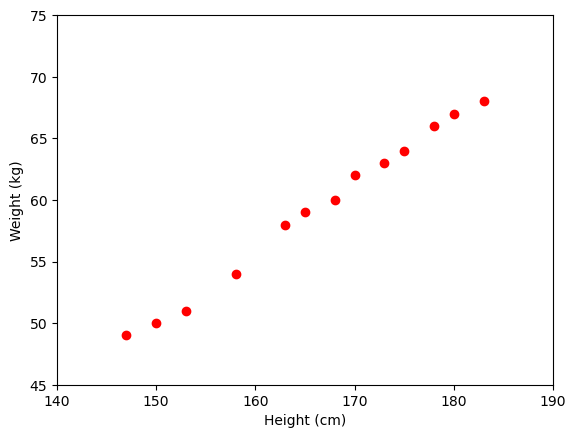

In [443]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Ta thấy các điểm dữ liệu sắp xếp giống như là 1 đường thẳng nên khả năng là mô hình Linear Regression cho ra kết quả tốt.

### Tìm nghiệm

> Công thức : $$W = (X^TX)^\dagger X^TY$$

In [448]:
#Add 1's column to Matrix X
ones = np.ones((X.shape[0],1))
X_added = np.concatenate((ones,X),axis = 1)
X_added

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

Ta sẽ sử dụng thư viện đại số tuyến tính của numpy để tìm ma trận giả nghịch ($\textcolor{\red}{numpy.linalg.pinv(A)}$ trong đó $\textcolor{\red}{pinv}$ là viết tắt của psuedo inverse)

In [451]:
# A = (X^T X)
A = np.transpose(X_added) @ X_added
W = np.linalg.pinv(A) @ np.transpose(X_added) @ y
W

array([[-33.73541021],
       [  0.55920496]])

In [453]:
# Preparing the fitting line 
w_0 = W[0][0]
w_1 = W[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

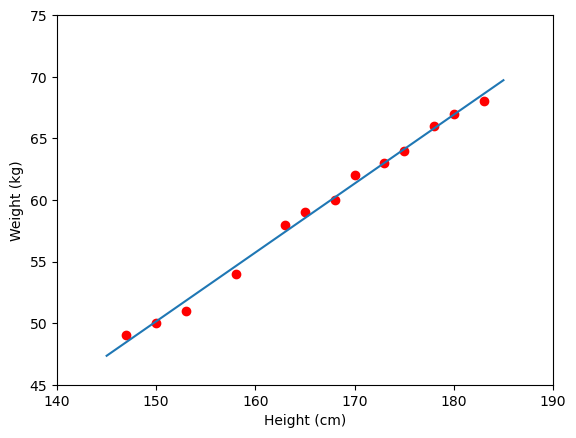

In [457]:
# Drawing the fitting line 
plt.plot(X[0:].T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Ta thấy các điểm dữ liệu nằm gần đường màu xanh (đường mô hình dự đoán), vậy là mô hình khá tốt trên dữ liệu training. Bây giờ ta sử dụng thử 2 điểm dữ liệu ta đề cập 155cm và 160cm để dự đoán cân nặng. (2 dữ liệu ko nằm trong bộ dữ liệu huấn luyện)

In [460]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Dự đoán cân nặng với chiều cao 155 cm: %.2f (kg), giá trị thực sự: 52 (kg)'  %(y1) )
print( u'Dự đoán cân nặng với chiều cao 160 cm: %.2f (kg), giá trị thực sự: 56 (kg)'  %(y2) )

Dự đoán cân nặng với chiều cao 155 cm: 52.94 (kg), giá trị thực sự: 52 (kg)
Dự đoán cân nặng với chiều cao 160 cm: 55.74 (kg), giá trị thực sự: 56 (kg)


### Nghiệm theo thư viện sklearn

In [463]:
#import library
from sklearn import linear_model

In [469]:
#fit model
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(X_added, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', W.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


Kết quả là giống nhau vậy là công thức ta đúng rùi :3

## Phần 3: Thảo luận

### Mở rộng bài toán

Ngoài các bài toán 1 biến như trên ta có thể giải các bài toán mà mô hình tuyến tính theo $w$, ví dụ: 
$\hat{y} = x_1 * w_1 + x_1^2 * w_2 + cos(x_1)^2 * w_3 + e^{x_2} * w_4 + x_2 * w_5$

Những giá trị ấy tuyến tính theo w nên có thể áp dụng mô hình Linear Regression. Với ví dụ trên mỗi giá trị đầu vào vector $\vec{x} = (x_1,x_2)$ ta tính toán các giá trị trị $\tilde{x} = (x_1,x_1^2,cos(w_1)^2,e^{x_2},x_2)$, bạn có thể cook thêm nữa.

![Mô hình khi áp dụng mô hình mở rộng](http://www.varsitytutors.com/assets/vt-hotmath-legacy/hotmath_help/topics/quadratic-regression/f-qr-1-1.gif)

Ảnh trên là ảnh khi bạn mở rộng công thức bạn lên hàm bậc 2

### Lợi hại việc mở rộng

Khi bạn mở rộng vậy thì mô hình bạn có khuynh hướng fit với trainning data hơn, nó khiến hàm của bạn trở nên phức tạp hơn nhưng chúng lại dễ khớp dữ liệu. Nhưng khớp quá lại không ổn, vì chúng sẽ dẫn đến chuyện High Varience (Overfit), nên ta cần phải cân bằng được độ phức tạp của hàm vừa cân bằng với đánh giá của những dữ liệu ngoài. Vì mục đích của học máy là đâu phải "học vẹt" mà là tạo ra hàm tổng quát cho bài toán.

### Hạn chế Linear Regression

Hạn chế đầu tiên của Linear Regression là nó rất nhạy cảm với nhiễu (sensitive to noise). Trong ví dụ về mối quan hệ giữa chiều cao và cân nặng bên trên, nếu có chỉ một cặp dữ liệu nhiễu (150 cm, 90kg) thì kết quả sẽ sai khác đi rất nhiều. Xem hình dưới đây:

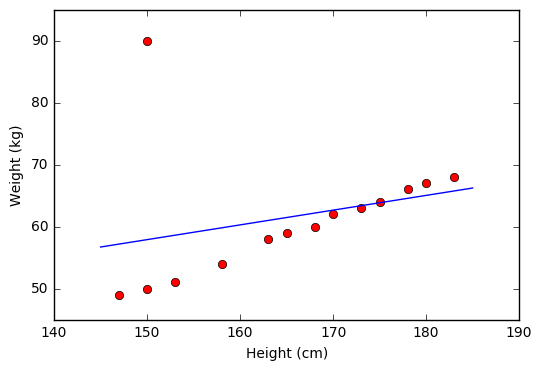

Vì vậy trước khi áp dụng mô hình này ta cần xử lý các dữ liệu ngoài lai (outlier). Bước này gọi là tiền xử lý (pre-processing).

Hạn chế tiếp theo là mô hình này không biểu diễn những bài toán có dạng phi tuyến tính. Dữ liệu hầu hết là dạng phi tuyến tính mà mô hình Linear Regression yêu cầu phải có quan hệ tuyến tính với w, thành ra mô hình này lại quá đơn giản so với các bài toán thực tế. Mặc dù ở trên ta có thể nâng bậc, hay thêm các hàm tính giá trị thành 1 chiều cho $\vec{x}$. Nhưng làm sao ta tìm các hàm ở trên? Nó là điều rất khó khăn.

### Các phương pháp tối ưu

Linear Regression là một mô hình đơn giản, bài toán đơn giản chỉ tìm đạo hàm bằng 0, cũng khá đơn giản. Nhưng trong hầu hết trường hợp của bài toán thực tế, ta không thể giải được đạo hàm bằng 0.

Linear Regression còn có thể tối ưu bằng thuật toán Gradient Descent mà mình sẽ trình bày sau này.

Bạn có thể áp dụng Regularization trong hàm sai số dự đoán để khi bạn nâng bậc dữ liệu lên cao thì nó có tính năng làm mịn hơn cái hàm Linear Regression bậc cao.